## Introduction:

Statistical estimates based on samples are inherently uncertain. In applied data analysis whether in business, healthcare, or policy evaluation decisions are often based on sample means rather than full populations.

**This project investigates:**

- How sample size affects uncertainty when estimating a population mean

- How the margin of error behaves as sample size increases

- How sampling variability appears even when the sample size is fixed

Using real-world data from the RAND Corporation Health Insurance Experiment, i have simulate repeated sampling to illustrate fundamental statistical principles that directly apply to survey analysis, A/B testing, and policy evaluation.

### Dataset

We use the RAND Health Insurance Experiment dataset (available via statsmodels).

- Observations: 20,190 individuals
- Each row represents one person

**Key variable used:**
- mdvis: number of outpatient doctor visits

Doctor visits (mdvis) are treated as a numeric outcome variable for estimating the population mean.

### Data Preparation

In [1]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans
from statsmodels.stats.proportion import proportion_confint, confint_proportions_2indep

pd.set_option("display.max_columns", 100)
pd.set_option("display.width", 120)

# Load data (bundled with statsmodels)
df = sm.datasets.randhie.load_pandas().data.copy()

df.head()

,mdvis,lncoins,idp,lpi,fmde,physlm,disea,hlthg,hlthf,hlthp
0,0,4.61512,1,6.907755,0.0,0.0,13.73189,1,0,0
1,2,4.61512,1,6.907755,0.0,0.0,13.73189,1,0,0
2,0,4.61512,1,6.907755,0.0,0.0,13.73189,1,0,0
3,0,4.61512,1,6.907755,0.0,0.0,13.73189,1,0,0
4,0,4.61512,1,6.907755,0.0,0.0,13.73189,1,0,0


In [5]:
#Droping missing of mdvis column (doctor visits)
x_all = df["mdvis"].dropna().astype(float).to_numpy()

### Task 1: Effect of Sample Size on Confidence Intervals

We investigate how confidence intervals behave as sample size increases.

For sample sizes: 𝑛 = 25, 50, 100, 250, 500, 1000

For each sample:
- Compute sample mean
- Compute standard error
- Compute 95% confidence interval

In [10]:

ns = [25, 50, 100, 250, 500, 1000]

rng = np.random.default_rng(42)  # reproducible
rows = []

for n in ns:

    x = rng.choice(x_all, size=n, replace=False)  # sample without replacement

    ds = DescrStatsW(x)

    mean_hat = ds.mean
    ci_low, ci_high = ds.zconfint_mean(alpha=0.05)
    moe = ci_high - mean_hat  # symmetric for z-CI

    rows.append({
        "n": n,
        "mean": float(mean_hat),
        "moe": float(moe),
        "ci_low": float(ci_low),
        "ci_high": float(ci_high),
    })

res = pd.DataFrame(rows).sort_values("n")
res

,n,mean,moe,ci_low,ci_high
0,25,3.960,3.145076,0.814924,7.105076
1,50,3.420,1.518275,1.901725,4.938275
2,100,3.170,1.055309,2.114691,4.225309
3,250,3.344,0.684582,2.659418,4.028582
4,500,2.396,0.294723,2.101277,2.690723
5,1000,2.991,0.288218,2.702782,3.279218


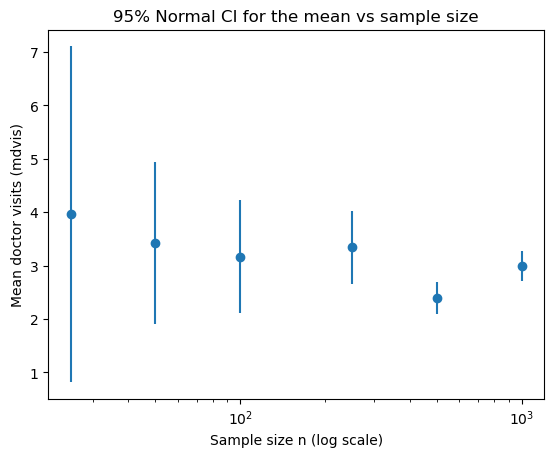

In [9]:
import matplotlib.pyplot as plt

# Visualizing how CI width shrinks as n grows
plt.figure()

plt.errorbar(
    x=res["n"],
    y=res["mean"],
    yerr=[res["mean"] - res["ci_low"], res["ci_high"] - res["mean"]],
    fmt="o",
)


plt.xscale("log")
plt.xlabel("Sample size n (log scale)")
plt.ylabel("Mean doctor visits (mdvis)")
plt.title("95% Normal CI for the mean vs sample size")
plt.show()

## Interpretation: How Sample Size Affects Uncertainty

From the results, we observe:

- Confidence intervals become narrower as sample size increases.
- The margin of error shrinks substantially between small and moderate sample sizes.
- Estimates become more stable for larger \( n \).

### Why Does This Happen?

The **standard error of the mean** is:

\[
SE = \frac{\sigma}{\sqrt{n}}
\]

As sample size increases:

- The denominator grows  
- The standard error decreases  
- The confidence interval becomes narrower  

### Practical Interpretation

In real-world data analytics:

- **Small samples** → high uncertainty → unstable decisions  
- **Larger samples** → more precise estimates → more reliable insights  

This is directly relevant in:

- Customer surveys  
- Healthcare utilization studies  
- A/B testing experiments  
- Policy evaluation  

## Task 2: Visualizing the Margin of Error

The margin of error (MOE) summarizes uncertainty:

\[
MOE = z_{\alpha/2} \times SE
\]

We now directly plot **MOE** against sample size.

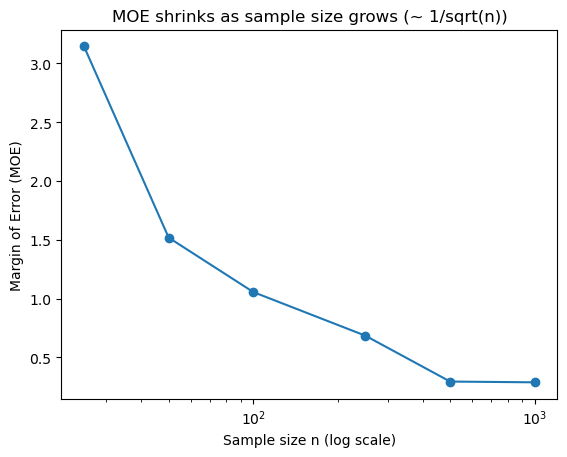

In [11]:
# Visualize MOE directly vs n
plt.figure()

plt.plot(res["n"], res["moe"], marker="o")

plt.xscale("log")
plt.xlabel("Sample size n (log scale)")
plt.ylabel("Margin of Error (MOE)")
plt.title("MOE shrinks as sample size grows (~ 1/sqrt(n))")
plt.show()


### Interpretation:

From the plot:

- MOE decreases rapidly at small sample sizes.
- The rate of decrease slows as n becomes large.
- The relationship closely matches the theoretical inverse square root pattern.

This confirms the theoretical law:

$$
MOE \propto \frac{1}{\sqrt{n}}
$$

**Why This Matters in Practice**

- Doubling the sample size does **not** cut uncertainty in half.
- To reduce the margin of error by 50%, you must **quadruple** the sample size.

This has direct implications for:

- Budgeting survey collection  
- Designing experiments  
- Determining required sample sizes  
- Cost–benefit analysis in data collection  

**More data improves precision — but with diminishing returns.**

## Task 3: Sampling Variability at Fixed Sample Size

Now we fix:

$$
n = 100
$$

and repeatedly draw multiple samples.

**Questions to answer:**

- Do all confidence intervals look the same?
- Why do the centers (means) change even though n is fixed?
- What does this tell you about the concept of sampling variability?

In [12]:
n_fixed = 100
B = 40  # number of repeated samples

cis = []
for i in range(B):
    x = rng.choice(x_all, size=n_fixed, replace=False)

    # Your code here
    ds = DescrStatsW(x)
    mean_hat = ds.mean
    ci_low, ci_high = ds.zconfint_mean(alpha=0.05)
    
    cis.append({"rep": i + 1, "mean": float(mean_hat), "ci_low": float(ci_low), "ci_high": float(ci_high)})

res3 = pd.DataFrame(cis)
res3.head()


,rep,mean,ci_low,ci_high
0,1,4.02,2.256807,5.783193
1,2,2.78,2.092202,3.467798
2,3,2.61,1.997197,3.222803
3,4,2.70,1.995525,3.404475
4,5,2.38,1.658501,3.101499


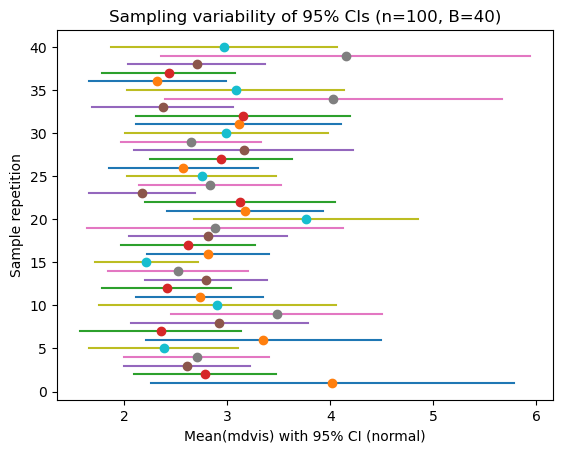

In [13]:
plt.figure()
for _, r in res3.iterrows():
    plt.plot([r["ci_low"], r["ci_high"]], [r["rep"], r["rep"]])      # CI line
    plt.plot(r["mean"], r["rep"], marker="o")                        # mean point

plt.xlabel("Mean(mdvis) with 95% CI (normal)")
plt.ylabel("Sample repetition")
plt.title(f"Sampling variability of 95% CIs (n={n_fixed}, B={B})")
plt.show()


### Interpretation: Sampling Variability

We observe:

- Confidence intervals are not identical.
- The centers (means) shift across samples.
- Some intervals are higher, some lower.

Even though Sample size is fixed and Data comes from the same population, the estimates vary.

**Why?**

- Each sample contains different individuals and this randomness produces natural variation in sample means.

This phenomenon is called **Sampling variability**, It is the foundation of statistical inference.


**Key Insight**

Even when sample size is fixed:

- The estimate is random.  
- The confidence interval is random.  
- Uncertainty does not disappear — it is quantified.

This explains why:

- Different surveys can give slightly different results.  
- A/B test results vary across repeated experiments.  
- Estimates are probabilistic, not deterministic.

## Conclusion:

Using real healthcare utilization data from the RAND Health Insurance Experiment, this project demonstrated:

- The inverse square root relationship between sample size and uncertainty  
- The shrinking of margin of error as sample size increases  
- The inherent randomness of estimates under repeated sampling  

These findings reinforce a fundamental principle of data analysis:
**Estimates are uncertain — and understanding that uncertainty is as important as computing the estimate itself.**